In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read dataset
dataset = pd.read_csv('data/Ads_CTR_Optimisation.csv')

In [3]:
#Implementing Thompson Sampling algorithm from scratch

import random
users = len(dataset)
ads = 10
ads_selected = []
total_rewards = 0
number_of_rewards_1 = [0] * ads
number_of_rewards_0 = [0] * ads

for user in range(0,users):
    
    max_random = 0
    ad_upper = 0
    
    for ad in range(0,ads):
        
        random_beta = random.betavariate(number_of_rewards_1[ad] + 1, number_of_rewards_0[ad] + 1)
        
        if random_beta > max_random:
            max_random = random_beta
            ad_upper = ad
    ads_selected.append(ad_upper)
    reward = dataset.values[user,ad_upper]
    if reward == 1:
        number_of_rewards_1[ad_upper] = number_of_rewards_1[ad_upper] + 1
    else:
        number_of_rewards_0[ad_upper] = number_of_rewards_0[ad_upper] + 1
    total_rewards = total_rewards + reward

In [4]:
print(total_rewards)

2579


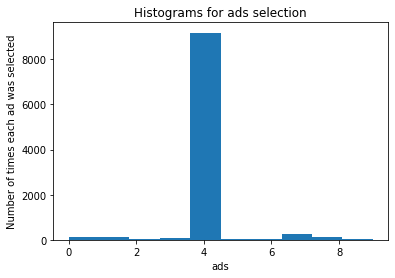

In [5]:
#Visualizing the results
plt.hist(ads_selected)
plt.title('Histograms for ads selection')
plt.xlabel('ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

**Total_rewards is turned out to be more than double as compared to random selection method.**